In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

In [2]:
training_data = pd.read_csv("/kaggle/input/ieee-hackathon/UNSW_NB15_training-set.csv")
testing_data = pd.read_csv("/kaggle/input/ieee-hackathon/UNSW_NB15_testing-set.csv")
training_data = training_data.drop_duplicates(subset="id")
testing_data = testing_data.drop_duplicates(subset="id")
combined_data = pd.concat([training_data, testing_data], ignore_index=True)
# The testing and training data have the same id column, with identical ids for different data points
combined_data = combined_data.drop("id", axis=1)
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                257673 non-null  float64
 1   proto              257673 non-null  object 
 2   service            257673 non-null  object 
 3   state              257673 non-null  object 
 4   spkts              257673 non-null  int64  
 5   dpkts              257673 non-null  int64  
 6   sbytes             257673 non-null  int64  
 7   dbytes             257673 non-null  int64  
 8   rate               257673 non-null  float64
 9   sttl               257673 non-null  int64  
 10  dttl               257673 non-null  int64  
 11  sload              257673 non-null  float64
 12  dload              257673 non-null  float64
 13  sloss              257673 non-null  int64  
 14  dloss              257673 non-null  int64  
 15  sinpkt             257673 non-null  float64
 16  di

In [3]:
combined_data.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,Normal,0


In [4]:
combined_data.shape

(257673, 44)

In [5]:
combined_data.describe()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,257673.000000,257673.000000,257673.000000,2.576730e+05,2.576730e+05,2.576730e+05,257673.000000,257673.000000,2.576730e+05,2.576730e+05,...,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000
mean,1.246715,19.777144,18.514703,8.572952e+03,1.438729e+04,9.125391e+04,180.000931,84.754957,7.060869e+07,6.582143e+05,...,5.238271,4.032677,8.322964,0.012819,0.012850,0.132005,6.800045,9.121049,0.014274,0.639077
std,5.974305,135.947152,111.985965,1.737739e+05,1.461993e+05,1.603446e+05,102.488268,112.762131,1.857313e+08,2.412372e+06,...,8.160822,5.831515,11.120754,0.116091,0.116421,0.681854,8.396266,10.874752,0.118618,0.480269
min,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.078928e+01,62.000000,0.000000,1.231800e+04,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,0.004285,4.000000,2.000000,5.280000e+02,1.780000e+02,2.955665e+03,254.000000,29.000000,7.439423e+05,1.747441e+03,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,0.685777,12.000000,10.000000,1.362000e+03,1.064000e+03,1.250000e+05,254.000000,252.000000,8.000000e+07,2.210538e+04,...,4.000000,3.000000,8.000000,0.000000,0.000000,0.000000,8.000000,11.000000,0.000000,1.000000
max,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,2.242273e+07,...,59.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [6]:
combined_data.isnull().sum()

dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat           0
label      

In [7]:
combined_data.count()

dur                  257673
proto                257673
service              257673
state                257673
spkts                257673
dpkts                257673
sbytes               257673
dbytes               257673
rate                 257673
sttl                 257673
dttl                 257673
sload                257673
dload                257673
sloss                257673
dloss                257673
sinpkt               257673
dinpkt               257673
sjit                 257673
djit                 257673
swin                 257673
stcpb                257673
dtcpb                257673
dwin                 257673
tcprtt               257673
synack               257673
ackdat               257673
smean                257673
dmean                257673
trans_depth          257673
response_body_len    257673
ct_srv_src           257673
ct_state_ttl         257673
ct_dst_ltm           257673
ct_src_dport_ltm     257673
ct_dst_sport_ltm     257673
ct_dst_src_ltm      

In [8]:
# Basic Data Cleaning
combined_data = combined_data.dropna()
combined_data.count()

dur                  257673
proto                257673
service              257673
state                257673
spkts                257673
dpkts                257673
sbytes               257673
dbytes               257673
rate                 257673
sttl                 257673
dttl                 257673
sload                257673
dload                257673
sloss                257673
dloss                257673
sinpkt               257673
dinpkt               257673
sjit                 257673
djit                 257673
swin                 257673
stcpb                257673
dtcpb                257673
dwin                 257673
tcprtt               257673
synack               257673
ackdat               257673
smean                257673
dmean                257673
trans_depth          257673
response_body_len    257673
ct_srv_src           257673
ct_state_ttl         257673
ct_dst_ltm           257673
ct_src_dport_ltm     257673
ct_dst_sport_ltm     257673
ct_dst_src_ltm      

## Data Cleaning Results

-   No missing values found


## Classification Problem

-   Dependent Variable: `label`
-   Independent Variables: All columns except `label`
-   Binary Classification: `label` is a categorical variable with only two unique values: `0` and `1`
-   0 = Normal
-   1 = Attack


In [9]:
# Dependent Variable
y_var = "label"
# Independent Variables (Features)
x_vars = [col for col in combined_data.columns if col != y_var]  # All columns except the dependent variable

In [10]:
# Assess number of unique values of the data
combined_data.apply(lambda x: len(x.unique()))

dur                  109945
proto                   133
service                  13
state                    11
spkts                   646
dpkts                   627
sbytes                 9382
dbytes                 8653
rate                 115763
sttl                     13
dttl                      9
sload                121356
dload                116380
sloss                   490
dloss                   476
sinpkt               114318
dinpkt               110270
sjit                 117101
djit                 114861
swin                     22
stcpb                114473
dtcpb                114187
dwin                     19
tcprtt                63878
synack                57366
ackdat                53248
smean                  1377
dmean                  1362
trans_depth              14
response_body_len      2819
ct_srv_src               57
ct_state_ttl              7
ct_dst_ltm               52
ct_src_dport_ltm         52
ct_dst_sport_ltm         35
ct_dst_src_ltm      

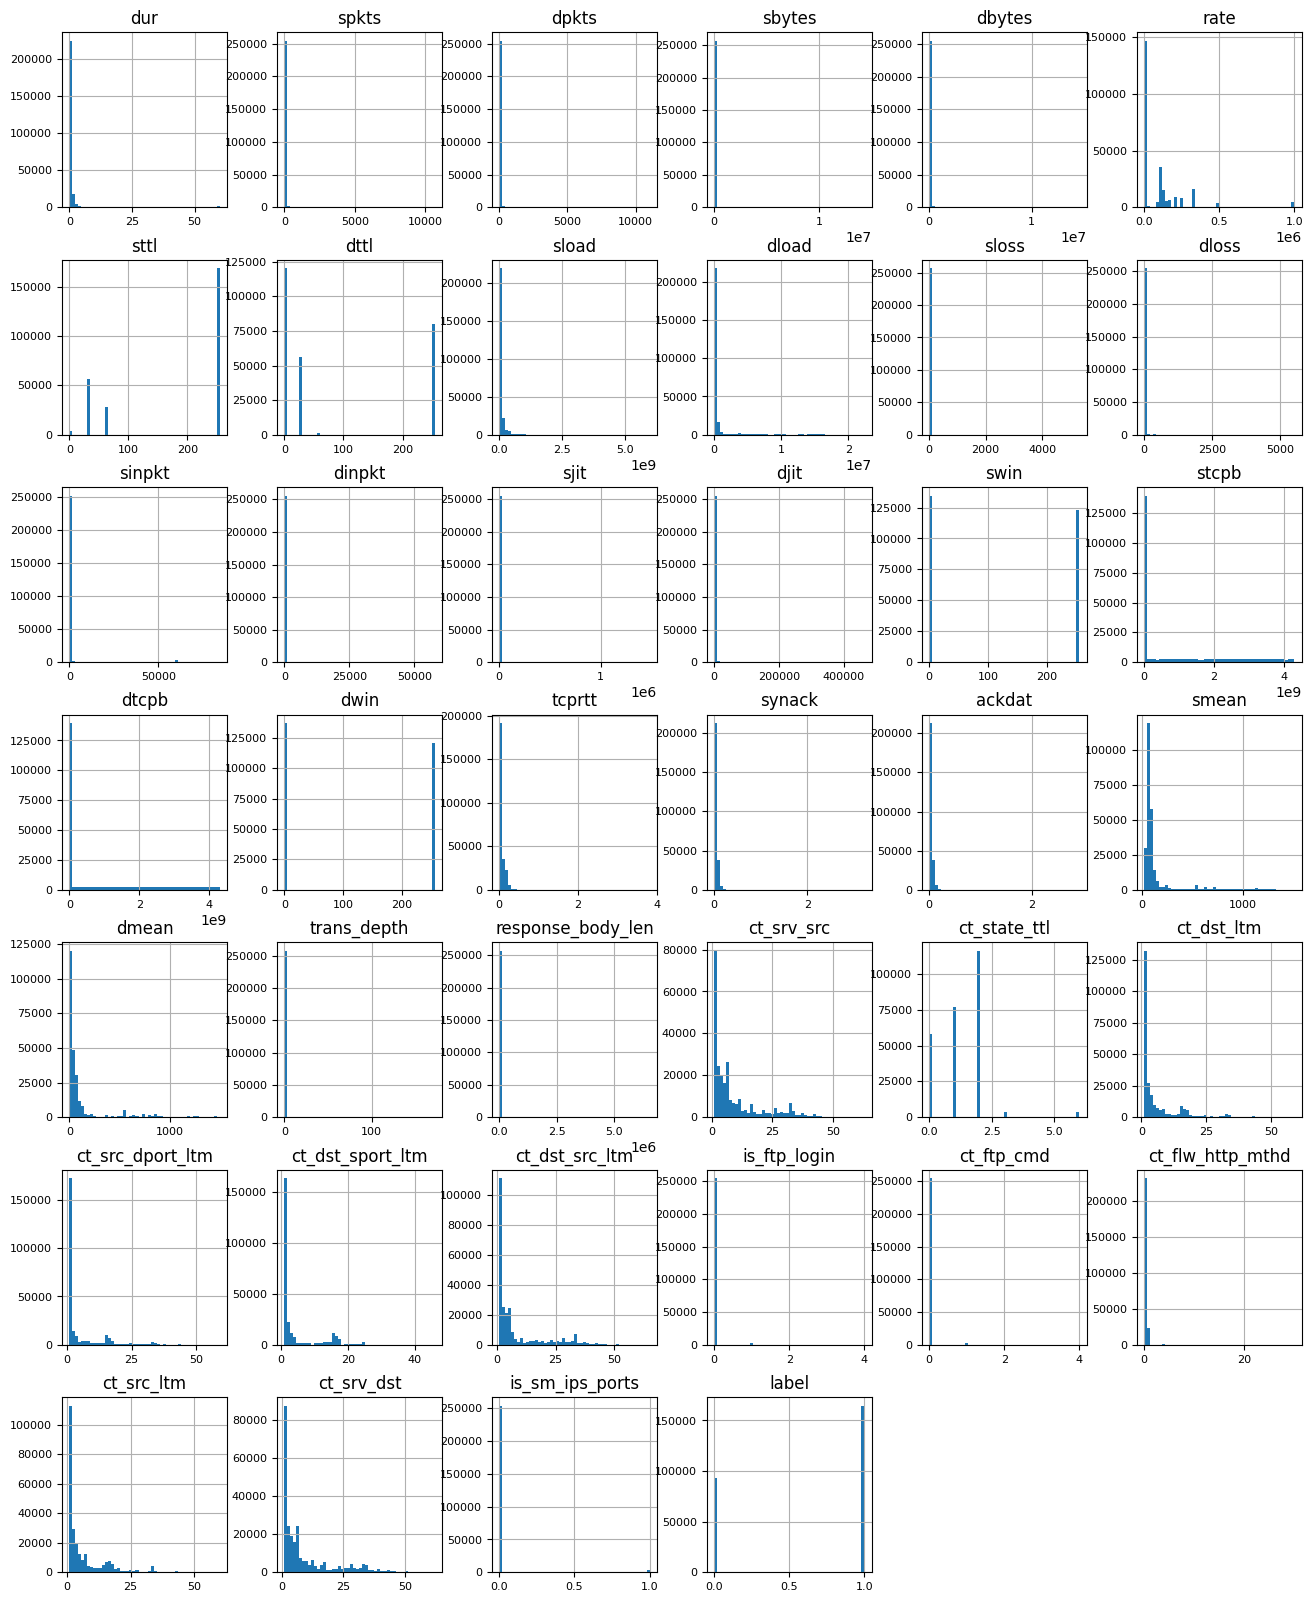

In [11]:
# Histograms
combined_data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

-   Data is imbalanced with `Normal` being the minority class and `Attack` being the majority class


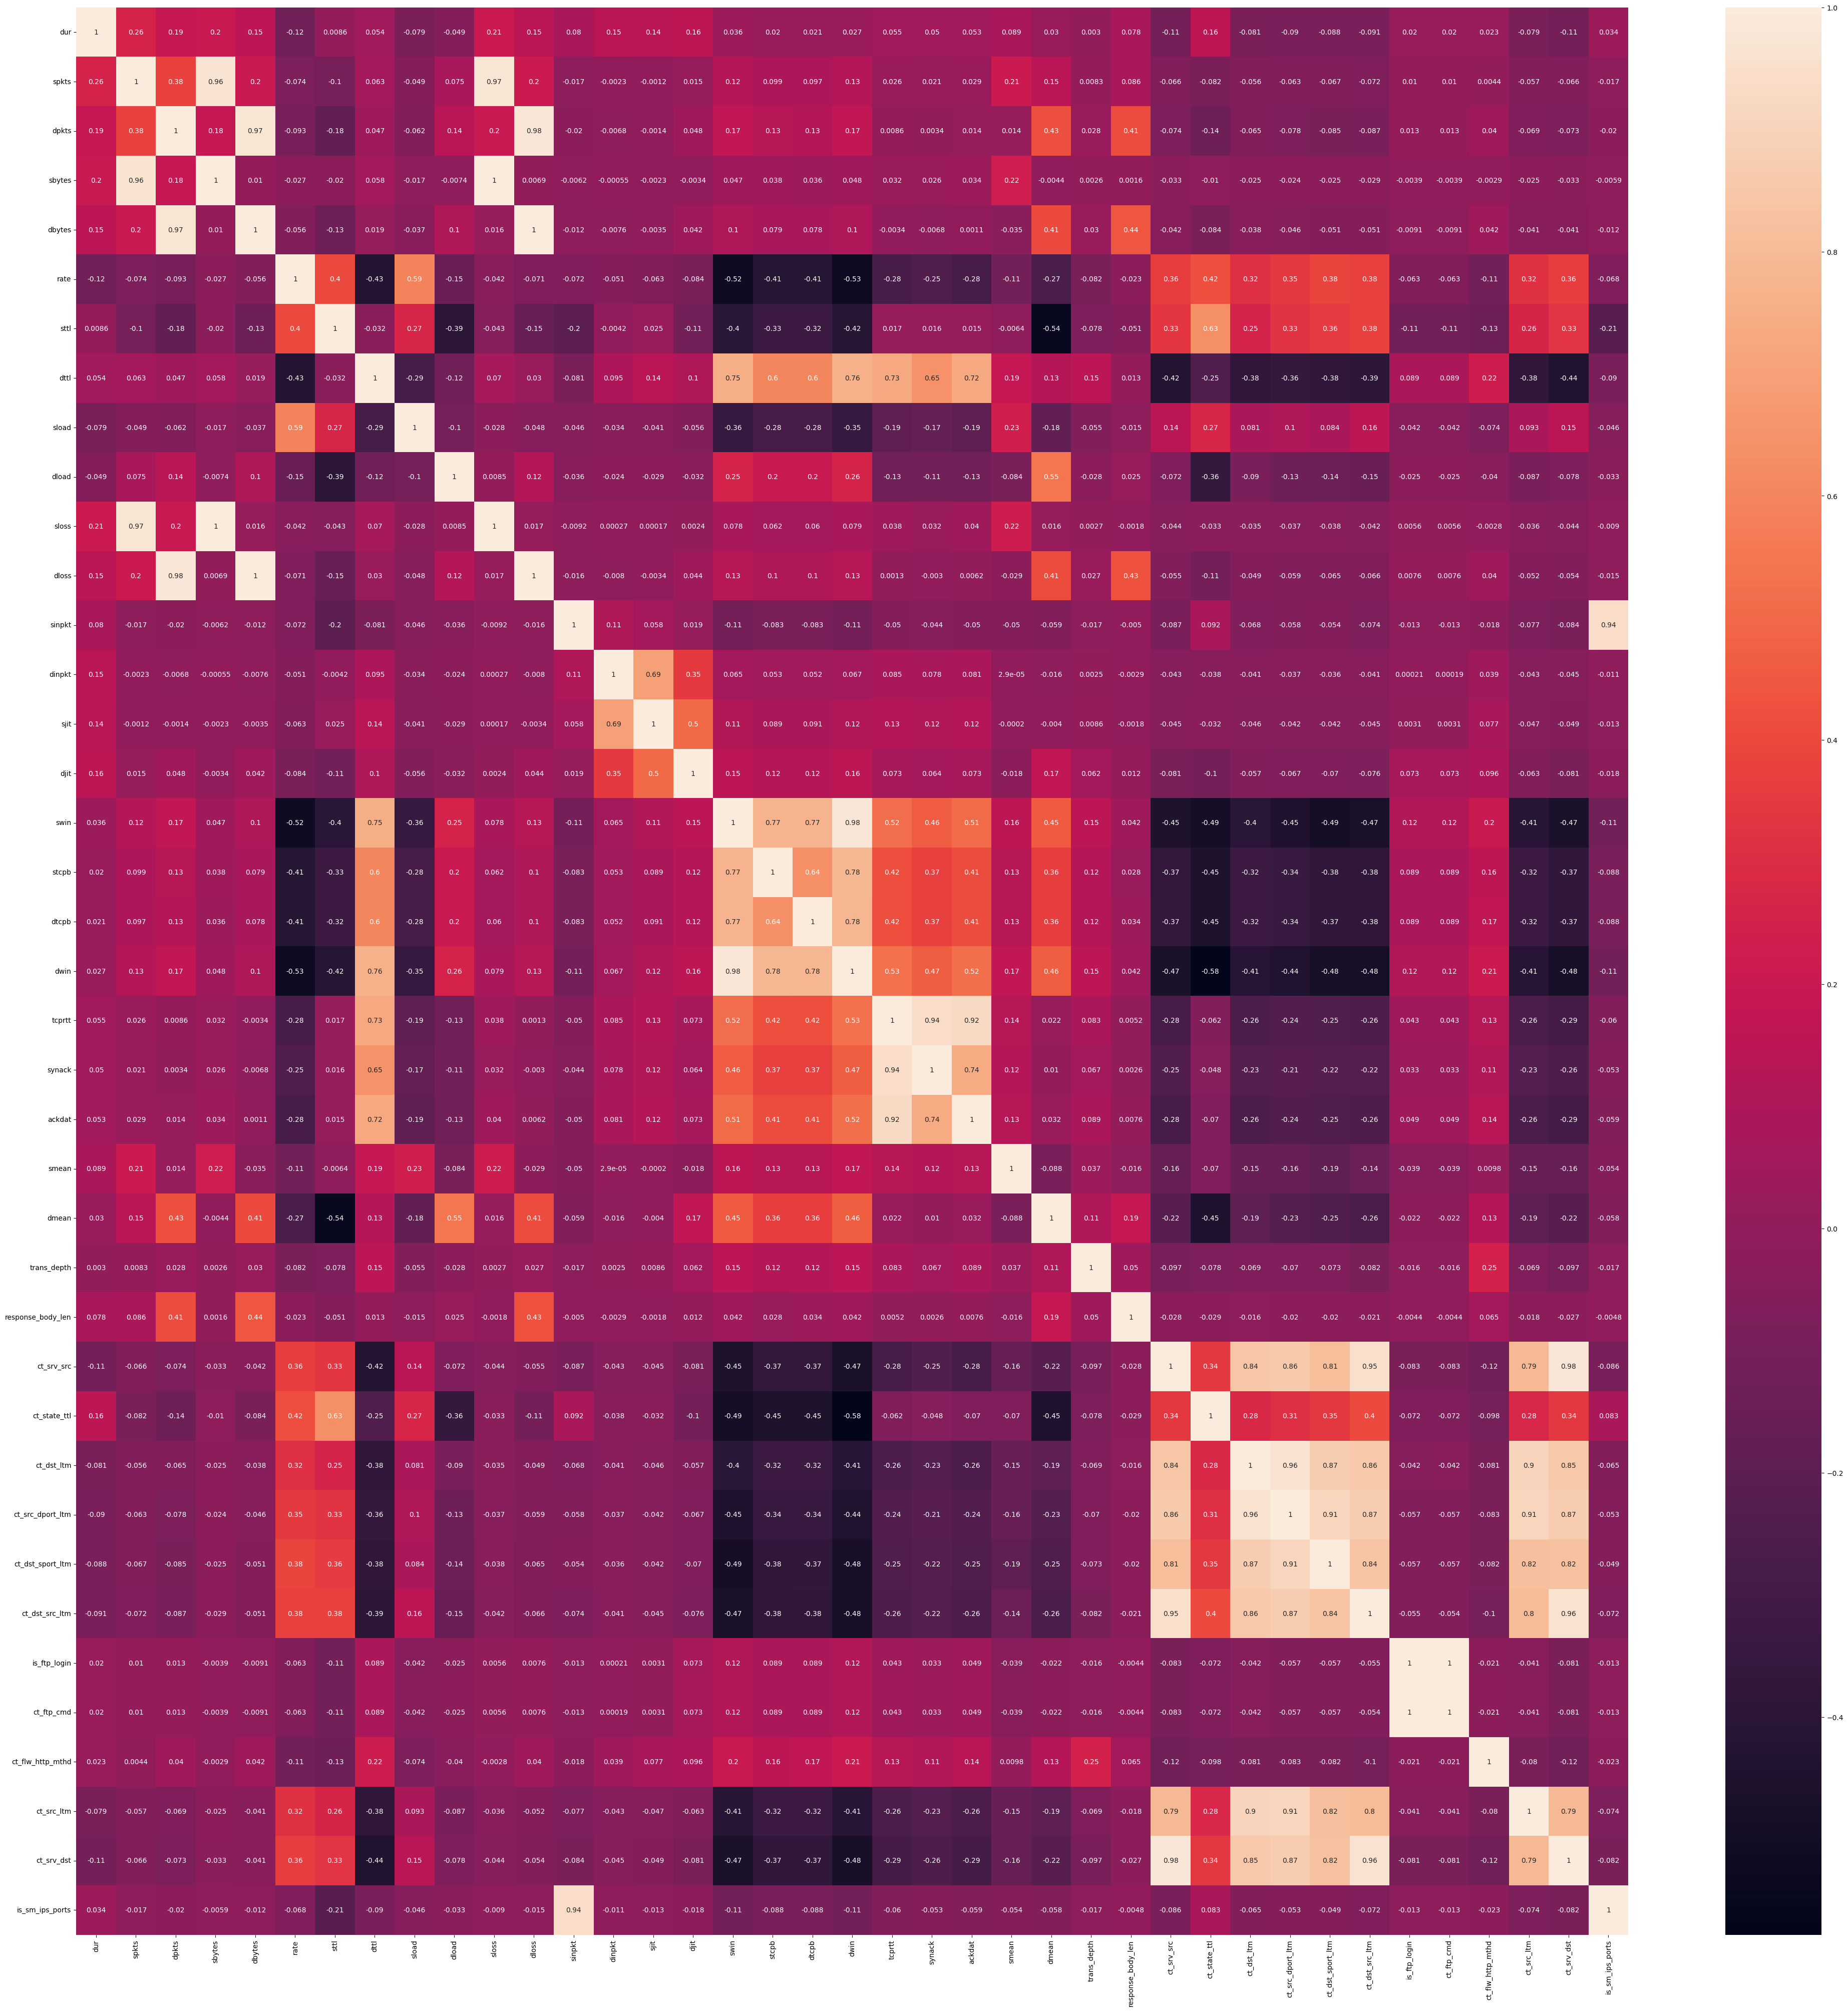

In [12]:
# Correlations
plt.figure(figsize=(50, 50))
# Dropping the dependent variable and categorical variables
sns.heatmap(combined_data.drop(columns=["label", "proto", "service", "state", "attack_cat"], axis=1).corr(), annot=True)
plt.show()

In [13]:
# Columns with corr above 0.6
correlation_matrix = combined_data.drop(columns=["label", "proto", "service", "state", "attack_cat"], axis=1).corr()

high_corr = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.6:
            colname = correlation_matrix.columns[i]
            high_corr.add(colname)

high_corr

{'ackdat',
 'ct_dst_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'ct_ftp_cmd',
 'ct_src_dport_ltm',
 'ct_src_ltm',
 'ct_srv_dst',
 'ct_state_ttl',
 'dbytes',
 'dloss',
 'dtcpb',
 'dwin',
 'is_sm_ips_ports',
 'sbytes',
 'sjit',
 'sloss',
 'stcpb',
 'swin',
 'synack',
 'tcprtt'}

In [14]:
# The dataset is too large to train on, so we sample 25000 rows
# combined_sample = combined_data.sample(25000)

# Split the target variables
# Exclude attack_cat column because it gives away the answer
combined_data = combined_data.drop(columns=["attack_cat"])
predictor = combined_data.iloc[:, combined_data.columns != "label"]
target = combined_data.iloc[:, combined_data.columns == "label"]
print(target.shape)
print(np.sum(target))

(257673, 1)
label    164673
dtype: int64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [15]:
# Save all categorical columns in list
categorical_columns = [col for col in predictor.columns.values if predictor[col].dtype == "object"]

# Dataframe with categorical features
df_categorical = predictor[categorical_columns]

# Dataframe with numerical features
df_numeric = predictor.drop(categorical_columns, axis=1)

In [16]:
# Using pandas.get_dummies function to Convert categorical variable into dummy/indicator variables
dummy_code_cat_vars = pd.get_dummies(df_categorical, drop_first=True)
    
dummy_code_cat_vars.describe()

,proto_a/n,proto_aes-sp3-d,proto_any,proto_argus,proto_aris,proto_arp,proto_ax.25,proto_bbn-rcc,proto_bna,proto_br-sat-mon,...,state_CLO,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
count,257673,257673,257673,257673,257673,257673,257673,257673,257673,257673,...,257673,257673,257673,257673,257673,257673,257673,257673,257673,257673
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,257541,257541,257277,257542,257541,253827,257541,257541,257541,257541,...,257672,237539,257661,140509,141235,257672,253840,257589,257672,257672


In [17]:
# Using concat function we merge the two dataframes for further analysis
df_predictor = pd.concat([df_numeric, dummy_code_cat_vars], axis=1)
df_predictor

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,state_CLO,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.121478,6,4,258,172,74.087490,252,254,1.415894e+04,8495.365234,...,False,False,False,True,False,False,False,False,False,False
1,0.649902,14,38,734,42014,78.473372,62,252,8.395112e+03,503571.312500,...,False,False,False,True,False,False,False,False,False,False
2,1.623129,8,16,364,13186,14.170161,62,252,1.572272e+03,60929.230470,...,False,False,False,True,False,False,False,False,False,False
3,1.681642,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,...,False,False,False,True,False,False,False,False,False,False
4,0.449454,10,6,534,268,33.373826,254,252,8.561499e+03,3987.059814,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000005,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,...,False,False,False,False,True,False,False,False,False,False
257669,1.106101,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,...,False,False,False,True,False,False,False,False,False,False
257670,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,...,False,False,False,False,True,False,False,False,False,False
257671,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,...,False,False,False,False,True,False,False,False,False,False


In [18]:
df_predictor.shape

(257673, 193)

In [19]:
# Let us now split the dataset into train & test
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(df_predictor, target, test_size=0.2, stratify=target)
print("x_train ", X_train.shape)
print("x_test ", X_test.shape)
print("y_train ", y_train.shape)
print("y_test ", y_test.shape)

x_train  (206138, 193)
x_test  (51535, 193)
y_train  (206138, 1)
y_test  (51535, 1)


## Feature Scaling


In [20]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))
X_train_scaled.columns = X_train.columns.values
X_test_scaled.columns = X_test.columns.values
X_train_scaled.index = X_train.index.values
X_test_scaled.index = X_test.index.values
X_train = X_train_scaled
X_test = X_test_scaled
X_train.describe()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,state_CLO,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
count,2.061380e+05,2.061380e+05,2.061380e+05,2.061380e+05,2.061380e+05,2.061380e+05,2.061380e+05,2.061380e+05,2.061380e+05,2.061380e+05,...,2.061380e+05,2.061380e+05,2.061380e+05,2.061380e+05,2.061380e+05,2.061380e+05,2.061380e+05,2.061380e+05,2.061380e+05,2.061380e+05
mean,-1.537330e-17,1.378771e-17,-1.930279e-17,-3.171173e-18,-7.652179e-18,1.029942e-16,-1.206425e-17,2.206034e-17,-7.142034e-17,-8.824134e-18,...,1.378771e-19,-1.909598e-17,-1.240894e-18,7.390213e-17,-2.647240e-17,-1.378771e-19,-1.034078e-17,-2.274972e-18,1.378771e-19,-2.757542e-19
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-2.087445e-01,-1.390758e-01,-1.676784e-01,-4.955811e-02,-9.944423e-02,-5.695813e-01,-1.756758e+00,-7.517210e-01,-3.813461e-01,-2.725563e-01,...,-2.202531e-03,-2.911060e-01,-6.229804e-03,-9.132185e-01,-9.079423e-01,-2.202531e-03,-1.228540e-01,-1.843078e-02,-2.202531e-03,-2.202531e-03
25%,-2.087431e-01,-1.316705e-01,-1.676784e-01,-4.903635e-02,-9.944423e-02,-5.693888e-01,-1.151758e+00,-7.517210e-01,-3.812794e-01,-2.725563e-01,...,-2.202531e-03,-2.911060e-01,-6.229804e-03,-9.132185e-01,-9.079423e-01,-2.202531e-03,-1.228540e-01,-1.843078e-02,-2.202531e-03,-2.202531e-03
50%,-2.080233e-01,-1.168599e-01,-1.495059e-01,-4.663626e-02,-9.820412e-02,-5.510957e-01,7.217894e-01,-4.945547e-01,-3.773258e-01,-2.718284e-01,...,-2.202531e-03,-2.911060e-01,-6.229804e-03,-9.132185e-01,-9.079423e-01,-2.202531e-03,-1.228540e-01,-1.843078e-02,-2.202531e-03,-2.202531e-03
75%,-9.315885e-02,-5.761720e-02,-7.681570e-02,-4.177811e-02,-9.203144e-02,2.122052e-01,7.217894e-01,1.482965e+00,5.122959e-02,-2.634915e-01,...,-2.202531e-03,-2.911060e-01,-6.229804e-03,1.095028e+00,1.101392e+00,-2.202531e-03,-1.228540e-01,-1.843078e-02,-2.202531e-03,-2.202531e-03
max,9.899606e+00,7.538790e+01,9.994485e+01,7.924249e+01,1.020182e+02,5.684711e+00,7.315474e-01,1.500701e+00,2.989895e+01,9.035609e+00,...,4.540231e+02,3.435174e+00,1.605187e+02,1.095028e+00,1.101392e+00,4.540231e+02,8.139746e+00,5.425706e+01,4.540231e+02,4.540231e+02


In [22]:
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

## Feature Selection

Feature selection is a critical preprocessing step that can improve model performance, reduce overfitting, and decrease computational requirements. We'll apply multiple feature selection techniques to identify the most important features for our intrusion detection task.

In [23]:
# Import necessary libraries for feature selection
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, mutual_info_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from time import time

# Display original feature count
print(f"Original number of features: {X_train.shape[1]}")

Original number of features: 193


In [24]:
# 1. Variance Threshold - Remove features with low variance
print("\n1. Variance Threshold")
start_time = time()

# Apply variance threshold
var_selector = VarianceThreshold(threshold=0.01)  # Features with variance < 0.01 will be removed
X_train_var = pd.DataFrame(var_selector.fit_transform(X_train), index=X_train.index)
X_test_var = pd.DataFrame(var_selector.transform(X_test), index=X_test.index)

# Get the selected feature names
var_selected_features = X_train.columns[var_selector.get_support()].tolist()
X_train_var.columns = var_selected_features
X_test_var.columns = var_selected_features

print(f"Features selected using variance threshold: {len(var_selected_features)}")
print(f"Removed {X_train.shape[1] - len(var_selected_features)} low-variance features")
print(f"Execution time: {time() - start_time:.2f} seconds")


1. Variance Threshold
Features selected using variance threshold: 193
Removed 0 low-variance features
Execution time: 0.61 seconds


In [25]:
# 2. Correlation-based Feature Selection
print("\n2. Correlation-based Feature Selection")
start_time = time()

# Calculate the correlation matrix
correlation_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.8
correlated_features = [column for column in upper.columns if any(upper[column] > 0.8)]
print(f"Number of correlated features: {len(correlated_features)}")

# Remove highly correlated features
X_train_corr = X_train.drop(columns=correlated_features)
X_test_corr = X_test.drop(columns=correlated_features)
corr_selected_features = X_train_corr.columns.tolist()

print(f"Features remaining after removing highly correlated features: {len(corr_selected_features)}")
print(f"Execution time: {time() - start_time:.2f} seconds")

# Plot correlation heatmap for remaining features (if not too many)
if len(corr_selected_features) <= 30:
    plt.figure(figsize=(12, 10))
    sns.heatmap(X_train_corr.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix After Removing Highly Correlated Features")
    plt.tight_layout()
    plt.show()


2. Correlation-based Feature Selection
Number of correlated features: 21
Features remaining after removing highly correlated features: 172
Execution time: 17.98 seconds


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)



3. Feature Importance using Random Forest
Top 30 features selected by Random Forest:
         Feature  Importance
6           sttl    0.121802
28  ct_state_ttl    0.055524
7           dttl    0.049953
5           rate    0.043399
3         sbytes    0.040865
8          sload    0.039120
37    ct_srv_dst    0.038823
4         dbytes    0.036894
0            dur    0.035560
24         dmean    0.034279
Execution time: 32.86 seconds


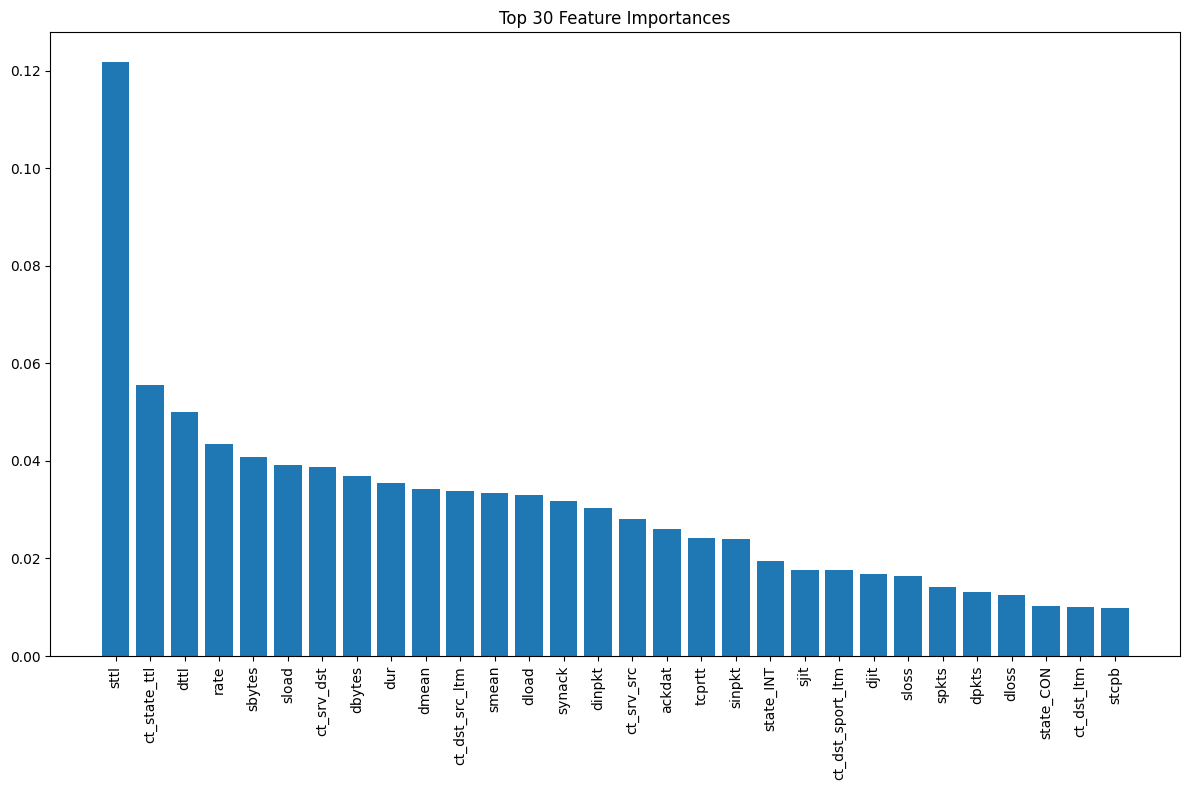

In [26]:
# 3. Feature Importance using Random Forest
print("\n3. Feature Importance using Random Forest")
start_time = time()

# Build a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train.values.ravel())  # Flatten y_train for sklearn compatibility

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({"Feature": X_train.columns, "Importance": importances}).sort_values(
    "Importance", ascending=False
)

# Select top k features based on importance
k = 30  # Number of top features to select
top_k_features = feature_importance_df["Feature"][:k].values
X_train_rf = X_train[top_k_features]
X_test_rf = X_test[top_k_features]

print(f"Top {k} features selected by Random Forest:")
print(feature_importance_df.head(10))  # Display top 10 features
print(f"Execution time: {time() - start_time:.2f} seconds")

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title(f"Top {k} Feature Importances")
plt.bar(range(k), importances[indices][:k], align="center")
plt.xticks(range(k), X_train.columns[indices][:k], rotation=90)
plt.tight_layout()
plt.show()

In [27]:
# 4. SelectKBest with F-test (ANOVA)
print("\n4. SelectKBest with F-test (ANOVA)")
start_time = time()

# Apply SelectKBest with f_classif (ANOVA F-test)
selector_f = SelectKBest(f_classif, k=30)
X_train_kbest_f_np = selector_f.fit_transform(X_train, y_train.values.ravel())
X_test_kbest_f_np = selector_f.transform(X_test)

# Get the selected feature names
kbest_f_selected_features = X_train.columns[selector_f.get_support()].tolist()

# Convert to DataFrame with feature names
X_train_kbest_f = pd.DataFrame(X_train_kbest_f_np, columns=kbest_f_selected_features, index=X_train.index)
X_test_kbest_f = pd.DataFrame(X_test_kbest_f_np, columns=kbest_f_selected_features, index=X_test.index)

print(f"Features selected using SelectKBest with F-test: {len(kbest_f_selected_features)}")
print(f"Selected features: {kbest_f_selected_features[:10]}...")  # Display first 10 features
print(f"Execution time: {time() - start_time:.2f} seconds")


4. SelectKBest with F-test (ANOVA)
Features selected using SelectKBest with F-test: 30
Selected features: ['dpkts', 'rate', 'sttl', 'sload', 'dload', 'sinpkt', 'swin', 'stcpb', 'dtcpb', 'dwin']...
Execution time: 0.61 seconds


In [28]:
# 5. SelectKBest with Mutual Information
print("\n5. SelectKBest with Mutual Information")
start_time = time()

# Apply SelectKBest with mutual_info_classif
selector_mi = SelectKBest(mutual_info_classif, k=30)
X_train_kbest_mi_np = selector_mi.fit_transform(X_train, y_train.values.ravel())
X_test_kbest_mi_np = selector_mi.transform(X_test)

# Get the selected feature names
kbest_mi_selected_features = X_train.columns[selector_mi.get_support()].tolist()

# Convert to DataFrame with feature names
X_train_kbest_mi = pd.DataFrame(X_train_kbest_mi_np, columns=kbest_mi_selected_features, index=X_train.index)
X_test_kbest_mi = pd.DataFrame(X_test_kbest_mi_np, columns=kbest_mi_selected_features, index=X_test.index)

print(f"Features selected using SelectKBest with Mutual Information: {len(kbest_mi_selected_features)}")
print(f"Selected features: {kbest_mi_selected_features[:10]}...")  # Display first 10 features
print(f"Execution time: {time() - start_time:.2f} seconds")


5. SelectKBest with Mutual Information
Features selected using SelectKBest with Mutual Information: 30
Selected features: ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload']...
Execution time: 207.76 seconds


In [29]:
# 6. Recursive Feature Elimination (RFE)
print("\n6. Recursive Feature Elimination (RFE)")
start_time = time()

# Apply RFE with Random Forest (using step=0.1 to speed up the process)
estimator = RandomForestClassifier(n_estimators=100, random_state=0)
selector_rfe = RFE(estimator, n_features_to_select=30, step=0.1)
X_train_rfe_np = selector_rfe.fit_transform(X_train, y_train.values.ravel())
X_test_rfe_np = selector_rfe.transform(X_test)

# Get the selected feature names
rfe_selected_features = X_train.columns[selector_rfe.get_support()].tolist()

# Convert to DataFrame with feature names
X_train_rfe = pd.DataFrame(X_train_rfe_np, columns=rfe_selected_features, index=X_train.index)
X_test_rfe = pd.DataFrame(X_test_rfe_np, columns=rfe_selected_features, index=X_test.index)

print(f"Features selected using RFE: {len(rfe_selected_features)}")
print(f"Selected features: {rfe_selected_features[:10]}...")  # Display first 10 features
print(f"Execution time: {time() - start_time:.2f} seconds")


6. Recursive Feature Elimination (RFE)
Features selected using RFE: 30
Selected features: ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload']...
Execution time: 321.64 seconds



7. Feature Selection Methods Comparison
Features common between RF and F-test: 16
Features common between RF and MI: 28
Features common between RF and RFE: 28
Features common between F-test and MI: 16
Features common between F-test and RFE: 17
Features common between MI and RFE: 27

Features common across all methods: 14
Common features: ['ct_dst_ltm', 'ct_state_ttl', 'dload', 'sload', 'ct_dst_src_ltm', 'sttl', 'dpkts', 'rate', 'sinpkt', 'ct_dst_sport_ltm', 'ct_srv_dst', 'dmean', 'ct_srv_src', 'state_INT']


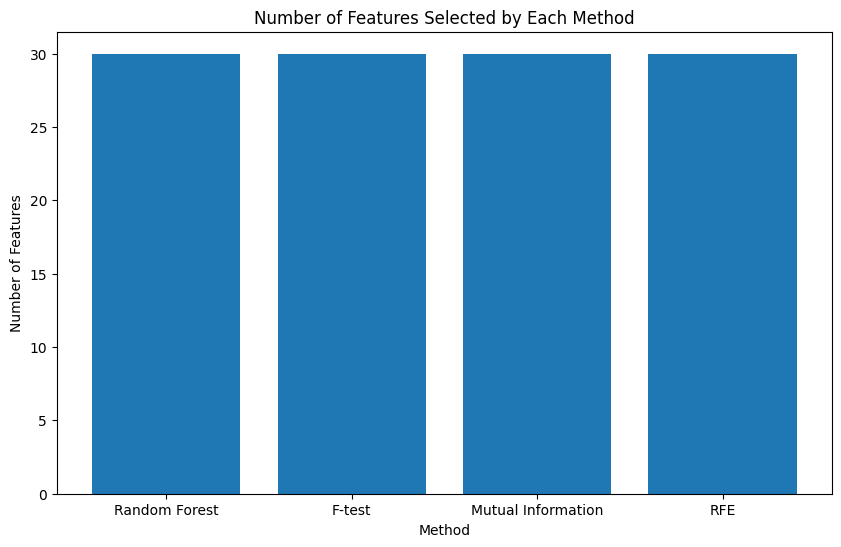

In [30]:
# 7. Comparing Feature Selection Methods
print("\n7. Feature Selection Methods Comparison")

# Calculate overlap between different feature selection methods
rf_set = set(top_k_features)
kbest_f_set = set(kbest_f_selected_features)
kbest_mi_set = set(kbest_mi_selected_features)
rfe_set = set(rfe_selected_features)

print(f"Features common between RF and F-test: {len(rf_set.intersection(kbest_f_set))}")
print(f"Features common between RF and MI: {len(rf_set.intersection(kbest_mi_set))}")
print(f"Features common between RF and RFE: {len(rf_set.intersection(rfe_set))}")
print(f"Features common between F-test and MI: {len(kbest_f_set.intersection(kbest_mi_set))}")
print(f"Features common between F-test and RFE: {len(kbest_f_set.intersection(rfe_set))}")
print(f"Features common between MI and RFE: {len(kbest_mi_set.intersection(rfe_set))}")

# Features common across all methods
common_features = list(rf_set.intersection(kbest_f_set).intersection(kbest_mi_set).intersection(rfe_set))
print(f"\nFeatures common across all methods: {len(common_features)}")
print(f"Common features: {common_features}")

# Create DataFrame for feature overlap visualization
methods = ["Random Forest", "F-test", "Mutual Information", "RFE"]
feature_counts = [len(rf_set), len(kbest_f_set), len(kbest_mi_set), len(rfe_set)]

# Bar chart of feature counts by method
plt.figure(figsize=(10, 6))
plt.bar(methods, feature_counts)
plt.title("Number of Features Selected by Each Method")
plt.xlabel("Method")
plt.ylabel("Number of Features")
plt.show()

In [31]:
# 8. Model Evaluation with Different Feature Sets
print("\n8. Model Evaluation with Different Feature Sets")

from sklearn.metrics import accuracy_score, roc_auc_score


# Function to evaluate model performance with selected features
def evaluate_feature_set(X_train_fs, X_test_fs, method_name):
    # Train a model
    model = RandomForestClassifier(n_estimators=100, random_state=0, class_weight="balanced")
    model.fit(X_train_fs, y_train.values.ravel())

    # Predict
    y_pred = model.predict(X_test_fs)
    y_prob = model.predict_proba(X_test_fs)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    return {"method": method_name, "n_features": X_train_fs.shape[1], "accuracy": accuracy, "auc": auc}


# Evaluate each feature selection method
results = []

# Original features (baseline)
results.append(evaluate_feature_set(X_train, X_test, "Original (All Features)"))

# Variance Threshold
results.append(evaluate_feature_set(X_train_var, X_test_var, "Variance Threshold"))

# Correlation-based
results.append(evaluate_feature_set(X_train_corr, X_test_corr, "Correlation-based"))

# Random Forest
results.append(evaluate_feature_set(X_train_rf, X_test_rf, "Random Forest"))

# F-test
results.append(evaluate_feature_set(X_train_kbest_f, X_test_kbest_f, "F-test"))

# Mutual Information
results.append(evaluate_feature_set(X_train_kbest_mi, X_test_kbest_mi, "Mutual Information"))

# RFE
results.append(evaluate_feature_set(X_train_rfe, X_test_rfe, "RFE"))

# Common Features
if len(common_features) > 0:
    X_train_common = X_train[common_features]
    X_test_common = X_test[common_features]
    results.append(evaluate_feature_set(X_train_common, X_test_common, "Common Features"))

# Display results as a DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values("auc", ascending=False)
results_df


8. Model Evaluation with Different Feature Sets


,method,n_features,accuracy,auc
0,Original (All Features),193,0.950907,0.991864
1,Variance Threshold,193,0.950907,0.991864
6,RFE,30,0.949491,0.991591
5,Mutual Information,30,0.950286,0.991508
3,Random Forest,30,0.949840,0.991306
4,F-test,30,0.943204,0.989774
7,Common Features,14,0.942563,0.989085
2,Correlation-based,172,0.940177,0.989017


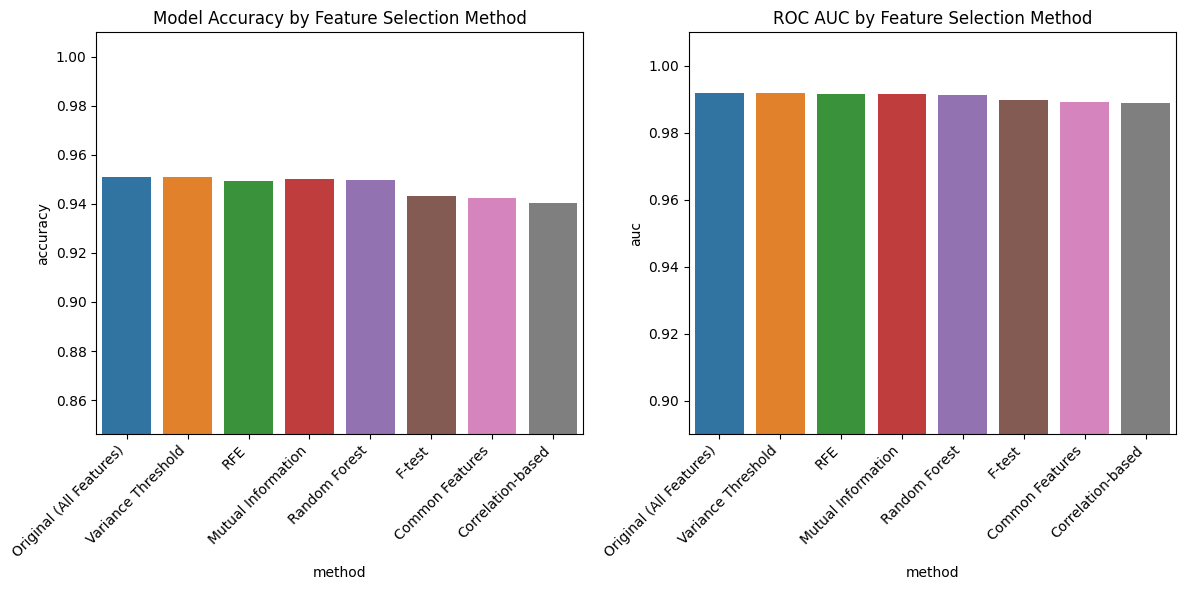

In [32]:
# Visualize the performance comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x="method", y="accuracy", data=results_df)
plt.title("Model Accuracy by Feature Selection Method")
plt.xticks(rotation=45, ha="right")
plt.ylim(0.9 * results_df["accuracy"].min(), 1.01)

plt.subplot(1, 2, 2)
sns.barplot(x="method", y="auc", data=results_df)
plt.title("ROC AUC by Feature Selection Method")
plt.xticks(rotation=45, ha="right")
plt.ylim(0.9 * results_df["auc"].min(), 1.01)

plt.tight_layout()
plt.show()

In [ ]:
# 9. Feature Selection Conclusion
best_method = results_df.iloc[0]["method"]
print(f"Best performing feature selection method: {best_method}")
print(f"Number of features: {results_df.iloc[0]['n_features']}")
print(f"Accuracy: {results_df.iloc[0]['accuracy']:.4f}")
print(f"AUC: {results_df.iloc[0]['auc']:.4f}")

# Update X_train and X_test with the selected features from the best method
if best_method == "Original (All Features)":
    print("\nUsing all original features for model training.")
    selected_features = X_train.columns.tolist()
    # Keep X_train and X_test as they are
elif best_method == "Variance Threshold":
    print("\nUpdating X_train and X_test with Variance Threshold selected features.")
    X_train = X_train_var
    X_test = X_test_var
    selected_features = var_selected_features
elif best_method == "Correlation-based":
    print("\nUpdating X_train and X_test with Correlation-based selected features.")
    X_train = X_train_corr
    X_test = X_test_corr
    selected_features = corr_selected_features
elif best_method == "Random Forest":
    print("\nUpdating X_train and X_test with Random Forest selected features.")
    X_train = X_train_rf
    X_test = X_test_rf
    selected_features = top_k_features.tolist()
elif best_method == "F-test":
    print("\nUpdating X_train and X_test with F-test selected features.")
    X_train = X_train_kbest_f
    X_test = X_test_kbest_f
    selected_features = kbest_f_selected_features
elif best_method == "Mutual Information":
    print("\nUpdating X_train and X_test with Mutual Information selected features.")
    X_train = X_train_kbest_mi
    X_test = X_test_kbest_mi
    selected_features = kbest_mi_selected_features
elif best_method == "RFE":
    print("\nUpdating X_train and X_test with RFE selected features.")
    X_train = X_train_rfe
    X_test = X_test_rfe
    selected_features = rfe_selected_features
elif best_method == "Common Features":
    print("\nUpdating X_train and X_test with Common Features across all methods.")
    X_train = X_train_common
    X_test = X_test_common
    selected_features = common_features

print(f"\nFinal training data shape: {X_train.shape}")
print(f"Final testing data shape: {X_test.shape}")

# Display top 10 selected features
print(f"\nTop 10 selected features (if available):\n{selected_features[:10]}")

In [33]:
X_train = X_train_common
X_test = X_test_common
selected_features = common_features
joblib.dump(selected_features, "selected_features.pkl")

['selected_features.pkl']

In [34]:
new_train = pd.concat([X_train, y_train], axis = 1)
new_test = pd.concat([X_test, y_test], axis = 1)
new_train

,ct_dst_ltm,ct_state_ttl,dload,sload,ct_dst_src_ltm,sttl,dpkts,rate,sinpkt,ct_dst_sport_ltm,ct_srv_dst,dmean,ct_srv_src,state_INT,label
3732,-0.252110,-1.335549,0.017215,-0.378250,-0.389377,-1.454258,-0.149506,-0.551186,-0.131837,-0.349571,-0.379801,-0.128324,-0.682363,-0.907942,0
164373,1.211736,0.680484,-0.272556,0.029601,1.315958,0.721789,-0.167678,0.472801,-0.131837,2.050732,1.180350,-0.478737,1.160708,1.101392,1
12443,-0.130123,-1.335549,0.848404,-0.368573,-0.299623,-1.454258,-0.040471,-0.523546,-0.131803,-0.521021,-0.288028,0.005542,-0.129442,-0.907942,0
83158,-0.618072,0.680484,-0.272556,-0.043937,-0.299623,0.721789,-0.167678,0.681277,-0.131837,-0.521021,-0.379801,-0.478737,-0.405902,1.101392,1
163507,1.333723,0.680484,-0.272556,-0.107381,0.777431,0.721789,-0.167678,0.125340,-0.131836,2.050732,0.721482,-0.478737,0.699940,1.101392,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134862,-0.496084,0.680484,-0.272556,0.483805,-0.120114,0.721789,-0.167678,0.681277,-0.131837,-0.349571,-0.196254,-0.478737,-0.221595,1.101392,1
120273,-0.374097,0.680484,-0.272556,0.483805,-0.209868,0.721789,-0.167678,0.681277,-0.131837,-0.178121,-0.288028,-0.478737,-0.313749,1.101392,1
52000,-0.618072,-0.327533,-0.271447,-0.381129,-0.389377,0.721789,-0.113161,-0.569423,-0.124926,-0.521021,-0.379801,-0.301562,-0.313749,-0.907942,1
191453,0.845775,0.680484,-0.272556,0.235074,2.213504,0.721789,-0.167678,0.993992,-0.131837,1.536381,2.189860,-0.478737,2.174397,1.101392,1


In [35]:
new_test

,ct_dst_ltm,ct_state_ttl,dload,sload,ct_dst_src_ltm,sttl,dpkts,rate,sinpkt,ct_dst_sport_ltm,ct_srv_dst,dmean,ct_srv_src,state_INT,label
114534,-0.374097,0.680484,-0.272556,0.397290,-0.479132,0.721789,-0.167678,0.993992,-0.131837,-0.521021,-0.655122,-0.478737,-0.682363,1.101392,1
222876,-0.618072,0.680484,-0.272556,1.720972,-0.658641,0.721789,-0.167678,0.681277,-0.131837,-0.521021,-0.746896,-0.478737,-0.129442,1.101392,1
69949,-0.252110,0.680484,-0.272556,0.099294,0.418413,0.721789,-0.167678,0.125340,-0.131836,-0.006670,0.354387,-0.478737,0.331326,1.101392,1
208939,-0.496084,-1.335549,-0.240807,-0.381284,-0.658641,-1.454258,-0.004126,-0.569401,-0.118657,-0.521021,-0.655122,1.745797,-0.405902,-0.907942,0
227082,-0.374097,0.680484,-0.272556,0.235074,-0.479132,0.721789,-0.167678,0.993992,-0.131837,-0.178121,-0.196254,-0.478737,-0.221595,1.101392,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89019,-0.130123,4.712550,-0.272556,0.267517,-0.030359,0.721789,-0.167678,1.515183,-0.131837,-0.521021,-0.104481,-0.478737,-0.129442,-0.907942,0
145272,-0.618072,-0.327533,-0.271287,-0.381328,-0.658641,0.721789,-0.058643,-0.569515,-0.103547,-0.521021,-0.746896,-0.183445,-0.774517,-0.907942,1
242424,-0.618072,0.680484,-0.272556,1.919956,-0.658641,0.721789,-0.167678,0.055848,-0.131836,-0.521021,-0.746896,-0.478737,-0.774517,1.101392,0
133595,1.455711,0.680484,-0.272556,-0.073136,1.944240,0.721789,-0.167678,0.212205,-0.131836,2.393632,1.914539,-0.478737,1.897936,1.101392,1


In [36]:
new_train.to_csv("training_processed.csv", index=False)
new_test.to_csv("testing_processed.csv", index=False)

In [ ]:
X_train.to_csv("X_train_processed.csv", index=False)
X_test.to_csv("X_test_processed.csv", index=False)
y_train.to_csv("y_train_processed.csv", index=False)
y_test.to_csv("y_test_processed.csv", index=False)

## Model Building


In [46]:
classifiers = dict(
    # LogisticRegression=LogisticRegression(class_weight="balanced"),
    # SVC=SVC(probability=True, class_weight="balanced"),
    RandomForestClassifier=RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced"),
    # DummyClassifier=DummyClassifier(strategy="uniform"),
    # GradientBoostingClassifier=GradientBoostingClassifier(),
    # AdaBoostClassifier=AdaBoostClassifier(),
    # GaussianNB=GaussianNB(),
    # KNeighborsClassifier=KNeighborsClassifier(),
    # DecisionTreeClassifier=DecisionTreeClassifier(),
    # ExtraTreesClassifier=ExtraTreesClassifier(class_weight="balanced"),
)

classifiers.items()


dict_items([('RandomForestClassifier', RandomForestClassifier(class_weight='balanced', random_state=42))])

In [38]:
# Helpers
def plot_confusion_matrix(y_test, y_pred):
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)), annot=True, fmt="d", cmap="YlGnBu", alpha=0.8, vmin=0
    )
    plt.title("Confusion matrix of the classifier")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


def roc_auc(y_test, y_pred_proba):
    fpr, tpr, t = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label="ROC AUC " + str(round(auc, 2)))
    plt.legend()
    plt.show()

<ipython-input-47-d0a0aca4a811>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Model saved as randomforestclassifier.joblib
RandomForestClassifier


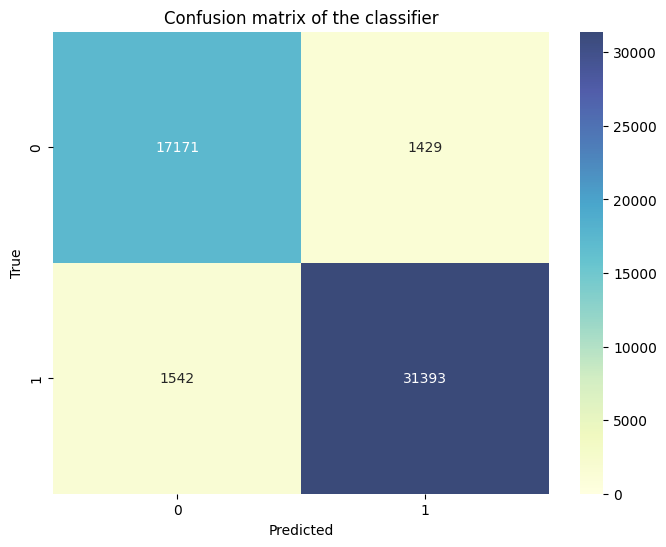

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     18600
           1       0.96      0.95      0.95     32935

    accuracy                           0.94     51535
   macro avg       0.94      0.94      0.94     51535
weighted avg       0.94      0.94      0.94     51535



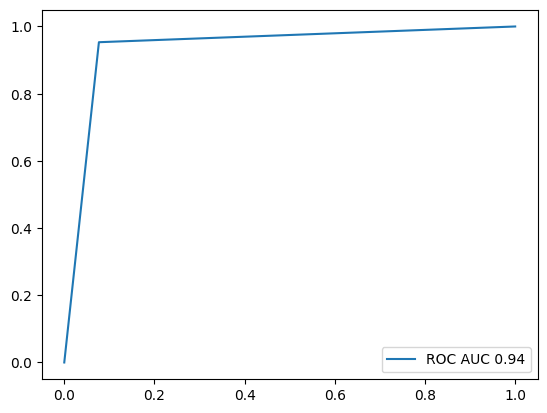

<ipython-input-47-d0a0aca4a811>:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_table = pd.concat(


In [47]:
import joblib
results_table = pd.DataFrame(columns=["Model", "Precision", "Recall", "F1", "ROC AUC"])
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)

    model_filename = f"{name.replace(' ', '_').lower()}.joblib"
    joblib.dump(clf, model_filename)
    print(f"Model saved as {model_filename}")
    
    y_pred_proba = clf.predict(X_test)
    y_pred = [1 if x > 0.5 else 0 for x in y_pred_proba]
    print(name)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plot_confusion_matrix(y_test, y_pred)
    print("Classification Report:")
    print(metrics.classification_report(y_test, y_pred))
    roc_auc(y_test, y_pred_proba)
    results_table = pd.concat(
        [
            results_table,
            pd.DataFrame(
                [[name, precision, recall, f1, auc]], columns=["Model", "Precision", "Recall", "F1", "ROC AUC"]
            ),
        ]
    )

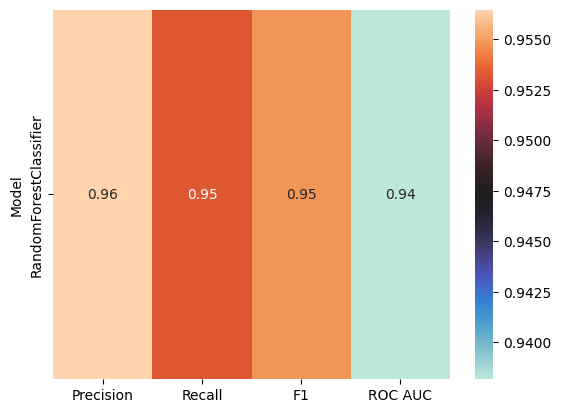

In [48]:
results_table.set_index('Model', inplace=True)
sns.heatmap(results_table, cmap="icefire", annot=True)
plt.show()

### Chosen Model: TODO


## Hyperparameter Tuning
